# Logistic Regression

In this notebook, we’ll:

1. Create a small toy dataset.
2. Build a logistic regression model from scratch using NumPy.
3. Visualize the sigmoid and logit functions.
4. Train our model using gradient descent.
5. Compare our implementation to scikit-learn’s LogisticRegression.


---

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



## Walkthrough of Logisitic Regression



### Create a Toy Dataset

In [2]:
# Toy dataset: GRE score vs Admission (1 = admitted, 0 = not admitted)
X = np.array([50, 60, 70, 90]).reshape(-1, 1)  # GRE scores
y = np.array([0, 0, 1, 1])  # Admission labels

# Normalize scores (scale between 0 and 1)
X_norm = X / 100

# Add intercept term (bias column)
X_b = np.c_[np.ones((X.shape[0], 1)), X_norm]  # Shape: (4, 2)

### Define Sigmoid and Logit Functions

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logit(p):
    return np.log(p / (1 - p))

### Plot Sigmoid and Logit Functions

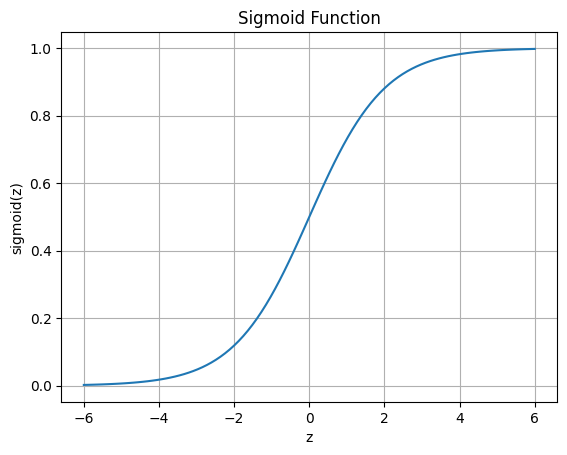

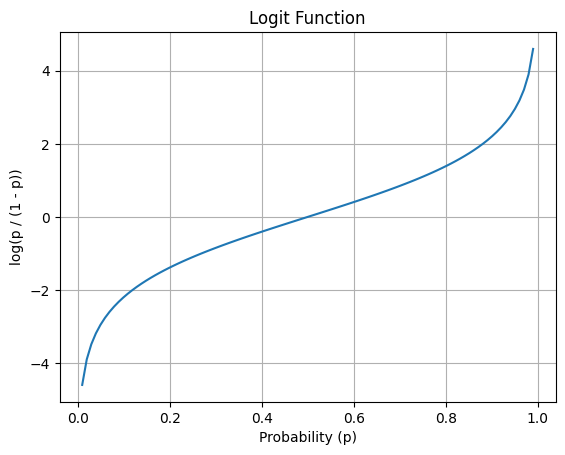

In [4]:
# Plot sigmoid function
z_vals = np.linspace(-6, 6, 100)
plt.plot(z_vals, sigmoid(z_vals))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()

# Plot logit function
p_vals = np.linspace(0.01, 0.99, 100)
plt.plot(p_vals, logit(p_vals))
plt.title("Logit Function")
plt.xlabel("Probability (p)")
plt.ylabel("log(p / (1 - p))")
plt.grid(True)
plt.show()

### Define Log Loss and Gradient Descent

In [5]:
# Define the log loss function (also known as binary cross-entropy loss)
def log_loss(y_true, y_pred):
    # We add a small epsilon value to avoid taking the log of zero,
    # which is mathematically undefined.
    epsilon = 1e-15

    # Clip the predicted probabilities so they never reach exactly 0 or 1.
    # This prevents issues when computing the logarithm.
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # Calculate the log loss:
    # For each prediction, if the true label is 1, we take the log of the predicted probability.
    # If the true label is 0, we take the log of one minus the predicted probability.
    # We then take the negative mean of these values over all data points.
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


# Define the gradient descent algorithm for our from-scratch logistic regression model.
def gradient_descent(X, y, lr=0.1, epochs=1000):
    # Initialize weights with zeros. The number of weights equals the number of features (columns in X).
    weights = np.zeros(X.shape[1])

    # Create an empty list to store the loss value at each epoch (iteration)
    loss_history = []

    # Loop over the specified number of epochs
    for _ in range(epochs):
        # Calculate the linear combination of inputs and weights (also known as "z")
        # For each data point, this is computed as: z = (bias term) + (feature value * weight)
        z = np.dot(X, weights)

        # Apply the sigmoid function to convert the linear combination into a probability.
        # The sigmoid function squashes any real number into a value between 0 and 1.
        preds = sigmoid(z)

        # Calculate the gradient (i.e., the partial derivatives of the loss function with respect to each weight)
        # This gradient tells us the direction to adjust our weights to reduce the loss.
        # np.dot(X.T, (preds - y)) computes the gradient for all weights at once.
        # Dividing by y.size (number of samples) calculates the average gradient.
        gradient = np.dot(X.T, (preds - y)) / y.size

        # Update the weights by moving them in the opposite direction of the gradient.
        # 'lr' is the learning rate, a small number that controls how big the step is.
        weights -= lr * gradient

        # Calculate the current log loss with the updated weights and save it.
        loss_history.append(log_loss(y, preds))

    # Return the final weights and the history of the loss over epochs for analysis/plotting.
    return weights, loss_history

- **Log Loss Function:**
It measures the error between our predicted probabilities and the true labels. Lower log loss means our predictions are closer to the true labels. The clipping ensures we don’t take the logarithm of 0.

- **Gradient Descent Function:**
This function iteratively adjusts the weights to minimize the log loss. For each epoch, it:
1.	Computes the model output (`z`).
2.	Converts it to probabilities with the sigmoid.
3.	Calculates the gradient (direction for improvement).
4.	Updates the weights by taking a small step (controlled by `lr`) in the opposite direction of the gradient.
5.	Records the loss for analysis.

###  Train Logistic Regression from Scratch

In [6]:
# Train the from-scratch logistic regression model
weights, loss_history = gradient_descent(X_b, y, lr=0.1, epochs=1000)


### Plot Loss Over Epochs

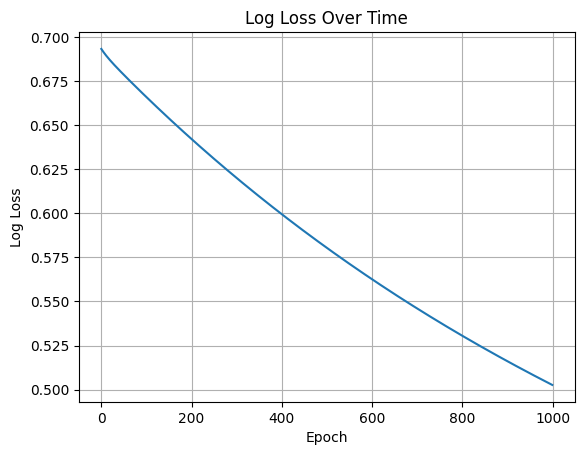

In [7]:
plt.plot(loss_history)
plt.title("Log Loss Over Time")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.grid(True)
plt.show()

### Predict Probabilities and Classes

In [8]:
# Predictions using from-scratch model
z_pred = np.dot(X_b, weights)
probs = sigmoid(z_pred)
preds = (probs >= 0.5).astype(int)

print("From-Scratch Predicted Probabilities:", np.round(probs, 3))
print("From-Scratch Predicted Classes:", preds)
print("From-Scratch Accuracy:", accuracy_score(y, preds))

From-Scratch Predicted Probabilities: [0.368 0.455 0.546 0.713]
From-Scratch Predicted Classes: [0 0 1 1]
From-Scratch Accuracy: 1.0


### Compare with Scikit-learn

In [9]:
# Now, train scikit-learn's LogisticRegression on the normalized inputs
logreg = LogisticRegression()
logreg.fit(X_norm, y)  # Using normalized data

sklearn_preds = logreg.predict(X_norm)
sklearn_probs = logreg.predict_proba(X_norm)[:, 1]

print("Sklearn Predicted Probabilities:", np.round(sklearn_probs, 3))
print("Sklearn Predicted Classes:", sklearn_preds)
print("Sklearn Accuracy:", accuracy_score(y, sklearn_preds))

Sklearn Predicted Probabilities: [0.489 0.495 0.502 0.514]
Sklearn Predicted Classes: [0 0 1 1]
Sklearn Accuracy: 1.0


### Comparing From-Scratch vs. Scikit-learn Logistic Regression

Both our from-scratch logistic regression and the scikit-learn implementation correctly classified all four data points, resulting in the same **predicted classes** and **accuracy** of 1.0.

However, if we compare the **predicted probabilities**, there are **slight differences** between the two models. For example, the from-scratch model might output a probability of 0.368 for a data point, while scikit-learn outputs 0.489 for the same input.

These differences happen because:
- Scikit-learn applies **regularization** (by default), which slightly adjusts the model to prevent overfitting by shrinking the learned weights.
  - Scikit-learn applies L2 regularization by default in logistic regression to prevent overfitting and improve generalization. It makes the model more stable, especially on small or noisy datasets.
- Scikit-learn also uses a highly optimized solver (`lbfgs`) to find the best parameters, while our from-scratch model uses basic gradient descent.

Even with these differences in how the probabilities are calculated, both models **draw the same decision boundary** (based on a threshold of 0.5), which is why their predicted classes and accuracy match exactly.

## Example Logistic Regression Implementation

We will use the breast cancer dataset to practice implementing logistic regression.

In [10]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Print basic information about the dataset
print("Shape of X (features):", X.shape)
print("Feature Names:", data.feature_names)
print("Target Names:", data.target_names)

Shape of X (features): (569, 30)
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target Names: ['malignant' 'benign']


### Data Exploration

- **X.shape** shows the dimensions of our dataset.
- **Feature Names** are the different measurements (like mean radius, mean texture, etc.).
- **Target Names** are the classes: 'malignant' and 'benign'.

Let's take a look at the distribution of classes.

In [11]:
# Explore the class distribution
unique, counts = np.unique(y, return_counts=True)
print("Class Distribution (0=malignant, 1=benign):", dict(zip(unique, counts)))

Class Distribution (0=malignant, 1=benign): {np.int64(0): np.int64(212), np.int64(1): np.int64(357)}


### Visualizing Feature Distributions

We will plot the distributions of two example features to see how they are spread out.

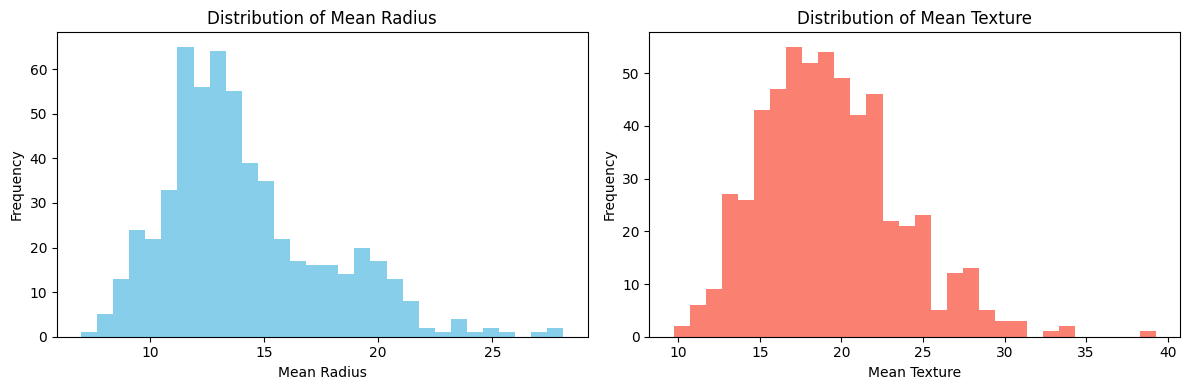

In [12]:
# Visualize the distributions of two selected features
plt.figure(figsize=(12, 4))

# Plot distribution for 'mean radius' (first feature)
plt.subplot(1, 2, 1)
plt.hist(X[:, 0], bins=30, color='skyblue')
plt.title('Distribution of Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')

# Plot distribution for 'mean texture' (second feature)
plt.subplot(1, 2, 2)
plt.hist(X[:, 1], bins=30, color='salmon')
plt.title('Distribution of Mean Texture')
plt.xlabel('Mean Texture')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Correlation Heatmap

This heatmap visualizes the correlation matrix of the features to help you see which features are strongly correlated with one another.

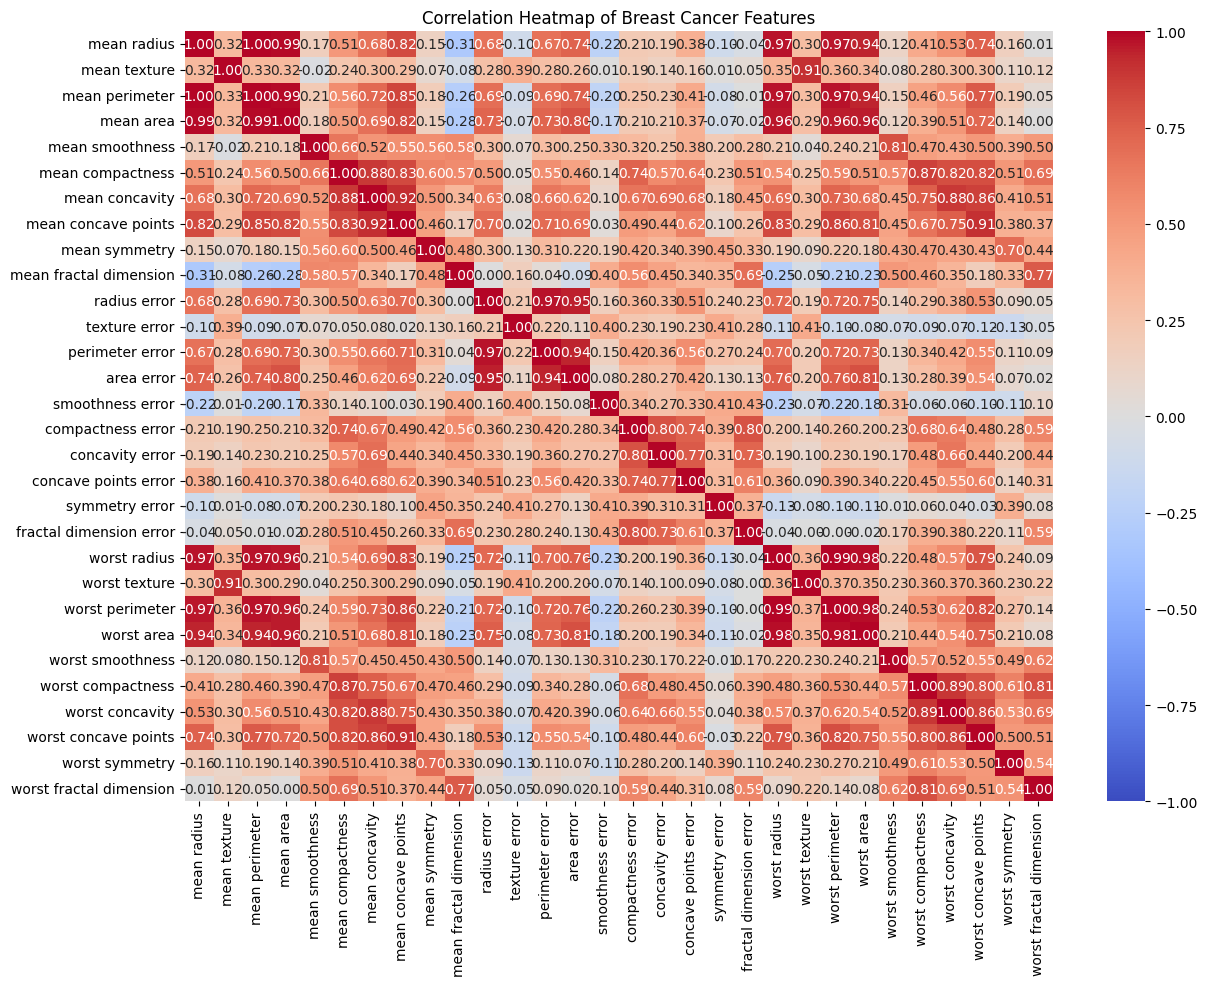

In [14]:
# Compute the correlation matrix for the full dataset (using the DataFrame)
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y  # Add target column
corr_matrix = df.drop('target', axis=1).corr()

# Generate the heatmap using seaborn
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Breast Cancer Features")
plt.show()

### Pairplot

We’ll use seaborn to generate a pairplot. This plot shows the pairwise relationships between a few selected features and can help identify correlations and patterns.

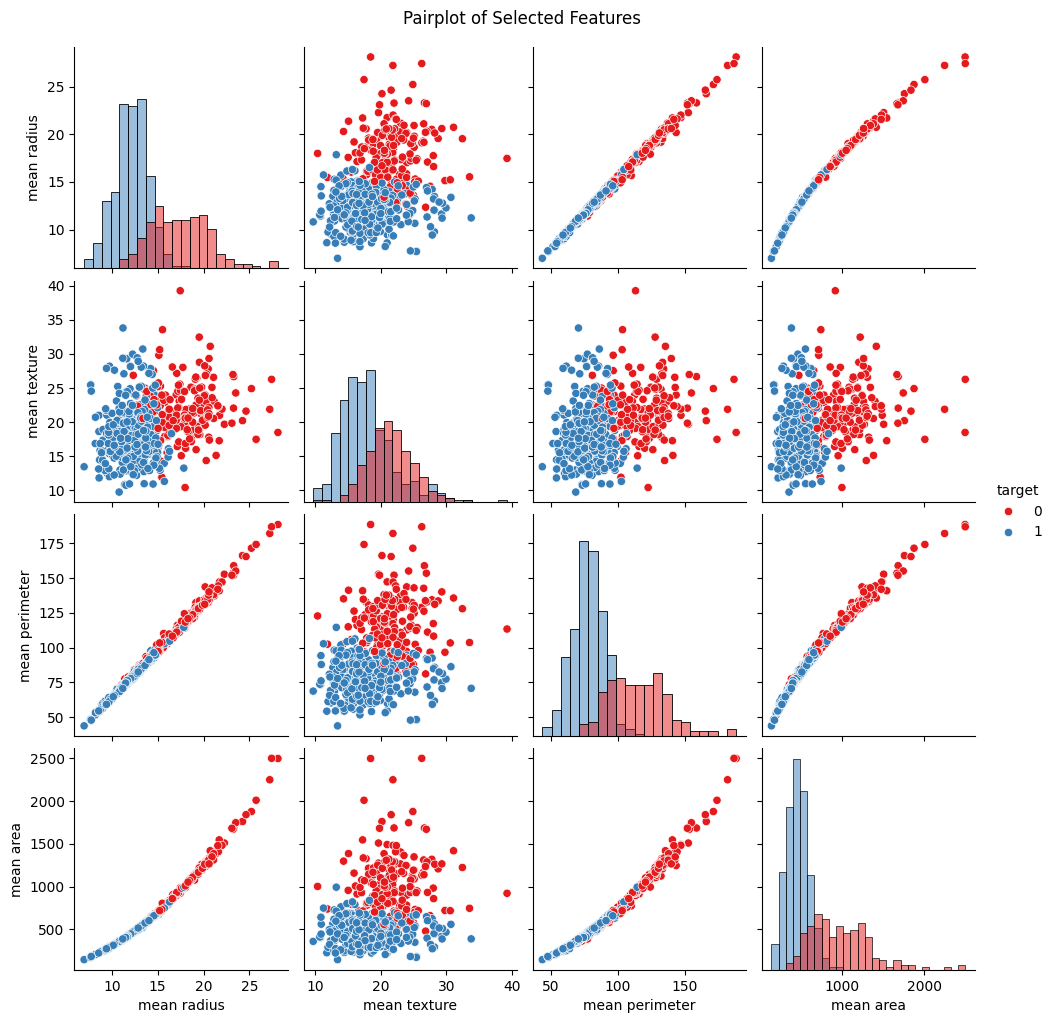

In [15]:
# Create a DataFrame from the Breast Cancer dataset for easier plotting
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y  # Add target column

# Select a subset of features to keep the pairplot manageable (e.g., 4 features)
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']
df_subset = df[features_to_plot]

# Generate the pairplot
sns.pairplot(df_subset, hue='target', diag_kind='hist', palette='Set1')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

### Pre-processing: Feature Scaling

The features in this dataset are measured on different scales. To improve model training (and ensure that all features contribute equally), we will normalize the features using `StandardScaler`. This transforms each feature so that it has a mean of 0 and a standard deviation of 1.

In [16]:

# Initialize the StandardScaler and transform the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Splitting the Data

We'll split the dataset into training and testing sets (80% training, 20% testing) to evaluate our model on unseen data.

In [17]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Training Logistic Regression using Scikit-learn

We now train a logistic regression model using the scaled training data. Scikit-learn's `LogisticRegression` uses L2 regularization by default to help prevent overfitting.

In [18]:
# Initialize and train the logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Model Evaluation

After training, we evaluate the model by predicting the class labels on the test set. We'll compute the accuracy and examine the confusion matrix and classification report.

In [19]:
# Predict class labels on the test set
y_pred = clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Display the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Visualizing the ROC Curve

The Receiver Operating Characteristic (ROC) curve shows the trade-off between the True Positive Rate and False Positive Rate at various thresholds. The Area Under the Curve (AUC) gives a measure of the model's ability to distinguish between classes.

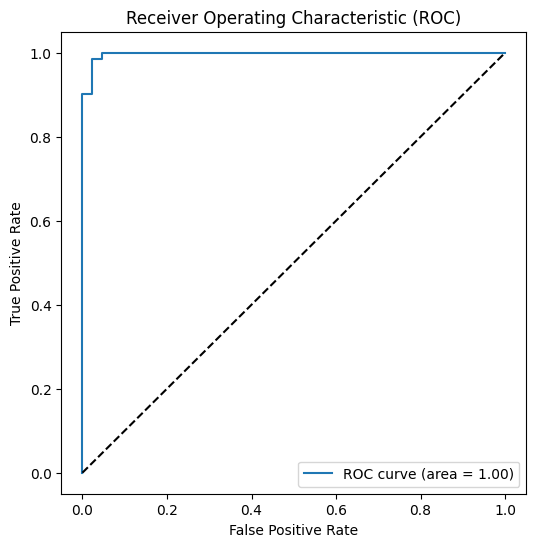

In [20]:
# Get predicted probabilities for the positive class
y_proba = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Summary & Interpretation

- **Data Exploration:**  
  We examined the dataset dimensions, feature names, and class distribution.

- **Pre-processing:**  
  We normalized the features using `StandardScaler` so that all features are on the same scale. This improves the convergence and performance of our logistic regression model.

- **Model Training:**  
  We trained a logistic regression model using scikit-learn. By default, scikit-learn uses L2 regularization (also known as Ridge regularization) to prevent overfitting.

- **Model Evaluation:**  
  The model's accuracy on the test set is reported, and additional metrics (confusion matrix, classification report, ROC curve) help us understand its performance.

Overall, this walkthrough demonstrates the full process of applying logistic regression—from data exploration and pre-processing to training and evaluation—with clear visualizations and interpretations.

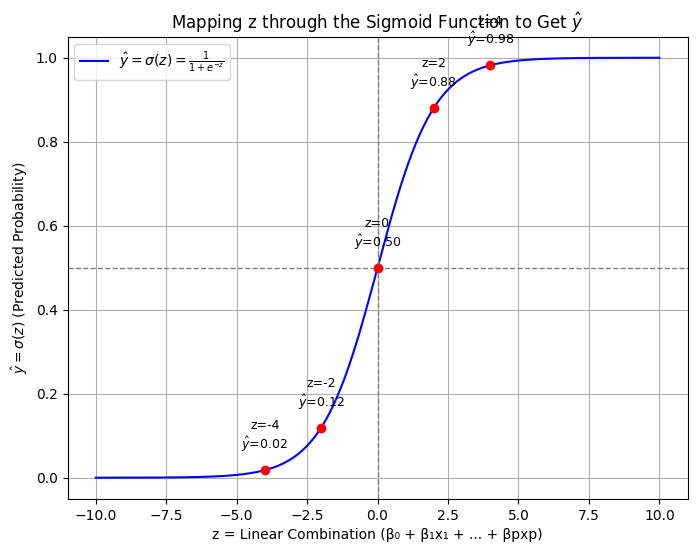

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of z values (the output of the linear combination)
z = np.linspace(-10, 10, 300)
y_hat = 1 / (1 + np.exp(-z))  # Sigmoid function

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(z, y_hat, label=r'$\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}$', color='blue')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)

# Add labels for sample z values and corresponding y-hats
sample_zs = [-4, -2, 0, 2, 4]
for z_val in sample_zs:
    y_val = 1 / (1 + np.exp(-z_val))
    plt.plot(z_val, y_val, 'ro')
    plt.text(z_val, y_val + 0.05, f'z={z_val}\n$\hat{{y}}$={y_val:.2f}',
             ha='center', fontsize=9)

plt.title("Mapping z through the Sigmoid Function to Get $\hat{y}$")
plt.xlabel("z = Linear Combination (β₀ + β₁x₁ + ... + βpxp)")
plt.ylabel(r"$\hat{y} = \sigma(z)$ (Predicted Probability)")
plt.grid(True)
plt.ylim(-0.05, 1.05)
plt.legend()
plt.show()